# <center> Marketing Analytics Final Project </center>
## <center>Fatih Ayaz</center>
### <center>Car Sales Marketing Analytics Report</center>

In [136]:
# Import Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,recall_score, f1_score, classification_report
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.metrics import confusion_matrix, classification_report

## EDA (Explatory Data Analysis)

In [137]:
# Load dataset
df = pd.read_csv("car_prices.csv")

In [148]:
#Check dataset

print ("Shape:", df.shape)
print ("\nNull Values:\n", df.isnull().sum())
print ("\nDescribe:\n",df.describe())

Shape: (457260, 16)

Null Values:
 year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

Describe:
                 year      condition       odometer            mmr  \
count  457260.000000  457260.000000  457260.000000  457260.000000   
mean     2010.115801      30.597113   68109.940286   12842.449700   
std         3.838896      13.199607   52105.088436    7517.323687   
min      1990.000000       1.000000       1.000000      25.000000   
25%      2008.000000      23.000000   29249.000000    7200.000000   
50%      2012.000000      34.000000   52880.000000   12050.000000   
75%      2013.000000      41.000000   98224.000000   17500.000000   
max      2015.000000      49.000000  999999.000000  110000.000000   

        sellingprice  
count  

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [140]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [141]:
# Assuming df is your DataFrame and 'make' is the feature name
print ("Shape:", df.shape)
df.dropna(subset=['make', 'model', 'trim', 'body', 'transmission', 'condition', 'color', 'odometer', 'interior', 'mmr', 'sellingprice', 'saledate'], inplace=True)
print ("Shape:", df.shape)# Drop rows with missing values in 'color', 'body', and 'sellingprice' columns
data.dropna(subset=['color', 'body', 'sellingprice'], inplace=True)

Shape: (558837, 16)
Shape: (472325, 16)


In [142]:
# Drop rows with missing values in 'color', 'body', and 'sellingprice' columns
data.dropna(subset=['color', 'body', 'sellingprice'], inplace=True)

### Outlier Detection
All 1 USD car sale prices are replaced with the mean of the car sale prices

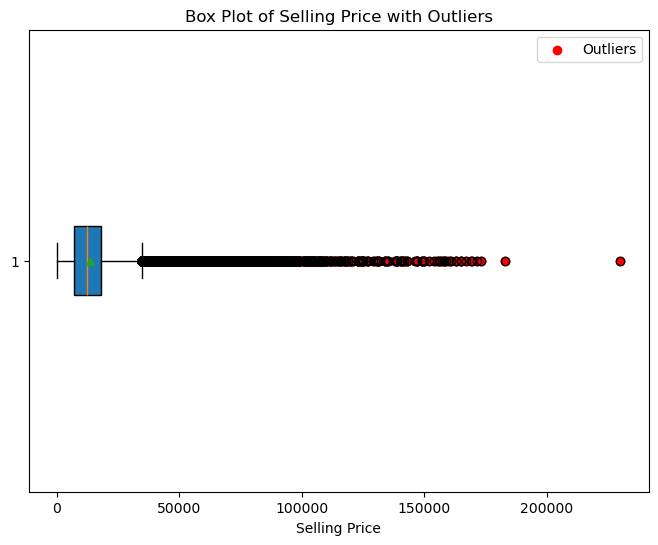

Original DataFrame shape: (466484, 16)
Cleaned DataFrame shape: (466484, 16)


In [143]:

# Identify outliers based on z-score
sellingprice_mean = df['sellingprice'].mean()
sellingprice_std = df['sellingprice'].std()
outlier_threshold = 3  # Adjust as needed
outliers = df[(df['sellingprice'] - sellingprice_mean).abs() > outlier_threshold * sellingprice_std]

# Visualize outliers using a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['sellingprice'], vert=False, patch_artist=True, showmeans=True)
plt.scatter(outliers['sellingprice'], [1] * len(outliers), color='red', label='Outliers')
plt.xlabel('Selling Price')
plt.title('Box Plot of Selling Price with Outliers')
plt.legend()
plt.show()

# Remove outliers from the DataFrame
df = df.drop(outliers.index)

# Check the shape of the cleaned DataFrame
print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", cleaned_df.shape)


In [144]:
# Calculate the mean selling price
mean_selling_price = df['sellingprice'].mean()

# Replace selling prices of 1 dollar with the mean
df['sellingprice'] = df['sellingprice'].replace(1, mean_selling_price)

# Check if there are any more occurrences of selling prices equal to 1
if (df['sellingprice'] == 1).any():
    print("There are still selling prices equal to 1 in the DataFrame.")
else:
    print("All occurrences of selling prices equal to 1 have been replaced with the mean.")

# Now you can proceed with further analysis or modeling


All occurrences of selling prices equal to 1 have been replaced with the mean.


Outliers:
        year           make          model                       trim  \
17      2014           Audi             Q5  2.0T Premium Plus quattro   
54      2015            Kia           K900                     Luxury   
57      2015          Lexus         RX 350                       Base   
60      2015            Kia           K900                     Luxury   
83      2014           Audi            TTS                    quattro   
...      ...            ...            ...                        ...   
558665  2013            GMC    Sierra 1500                        SLE   
558666  2013            GMC  Sierra 2500HD                     Denali   
558775  2014  Mercedes-Benz        E-Class                E350 Luxury   
558777  2012       Maserati   Quattroporte                          S   
558824  2013           Audi             S5       Premium Plus quattro   

               body transmission                vin state  condition  \
17              SUV    automatic  wa1lfaf

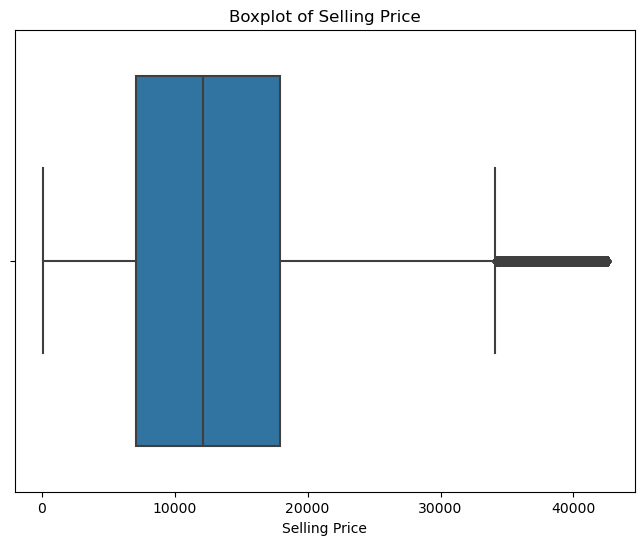

In [145]:


# Calculate quartiles
Q1 = df['sellingprice'].quantile(0.25)
Q3 = df['sellingprice'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['sellingprice'] < lower_threshold) | (df['sellingprice'] > upper_threshold)]

print("Outliers:")
print(outliers)

# Visualize boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['sellingprice'])
plt.title('Boxplot of Selling Price')
plt.xlabel('Selling Price')
plt.show()


In [146]:
# Remove outliers based on percentile thresholds
df = df[(df['sellingprice'] >= lower_threshold) & (df['sellingprice'] <= upper_threshold)]

# Check summary statistics of cleaned data
print(df.describe())

print(df.shape)

                year      condition       odometer            mmr  \
count  466484.000000  466484.000000  466484.000000  466484.000000   
mean     2010.173138      30.702826   67296.488227   13323.993159   
std         3.827010      13.250504   51966.313452    8194.715179   
min      1990.000000       1.000000       1.000000      25.000000   
25%      2008.000000      24.000000   28676.000000    7350.000000   
50%      2012.000000      35.000000   51872.000000   12200.000000   
75%      2013.000000      41.000000   97225.000000   17950.000000   
max      2015.000000      49.000000  999999.000000  110000.000000   

        sellingprice  
count  466484.000000  
mean    13171.475502  
std      8271.061961  
min         1.000000  
25%      7100.000000  
50%     12100.000000  
75%     17900.000000  
max     42500.000000  
(457260, 16)


In [147]:
print ("\nNull Values:\n", df.isnull().sum())
print ("\nNA Values:\n", df.isna().sum())


Null Values:
 year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

NA Values:
 year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64


### Insight 1: What are the top brands customer like to buy?

- Top 10 selected car brands are Nissan, Ford, Toyota, Honda, Chevrolet, and BMW. Nissan is the lead with the Altima model. Followed by Ford Fusion and F-150 truck.
- Top-10 model are belong to sedan models but only except F-150 because it is the legend truck in the USD when it was first introduced. It had sold 11950 count and getting the 3rd place in the list.

Top Selling Car Make and Model:
          make          model  count
542     Nissan         Altima  16344
233       Ford         Fusion  12113
220       Ford          F-150  11232
658     Toyota          Camry  10985
211       Ford         Escape  10652
229       Ford          Focus   9545
282      Honda         Accord   8528
118  Chevrolet         Impala   7500
287      Honda          Civic   7068
179      Dodge  Grand Caravan   6965


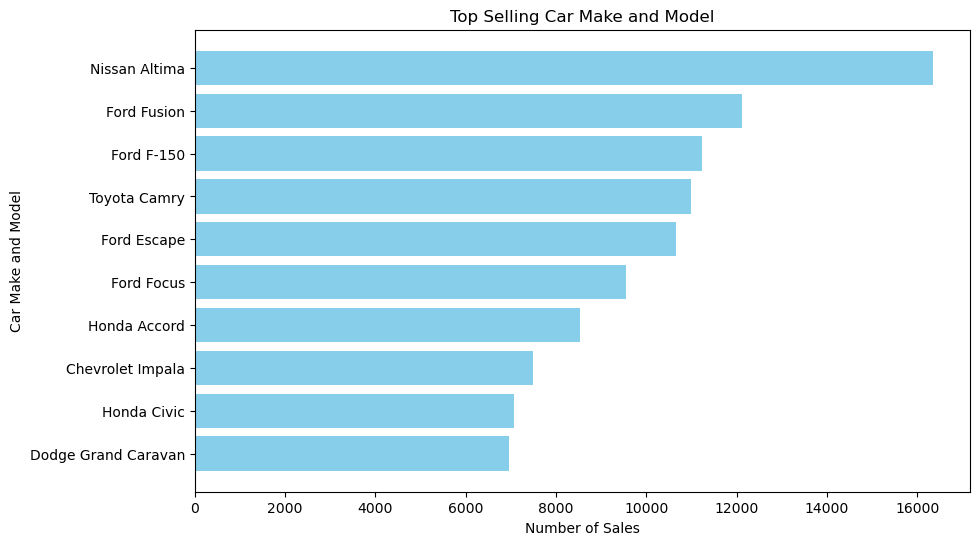

In [149]:
# 1. Top Selling Car Make and Model
top_selling_cars = df.groupby(['make', 'model']).size().reset_index(name='count')
top_selling_cars = top_selling_cars.sort_values(by='count', ascending=False).head(10)

# Display table information
print("Top Selling Car Make and Model:")
print(top_selling_cars)

# Plot bar graph
plt.figure(figsize=(10, 6))
plt.barh(top_selling_cars['make'] + ' ' + top_selling_cars['model'], top_selling_cars['count'], color='skyblue')
plt.xlabel('Number of Sales')
plt.ylabel('Car Make and Model')
plt.title('Top Selling Car Make and Model')
plt.gca().invert_yaxis() 
plt.show()

### Insight 2: Does it really mater transmission
As per our report seems that it is not a big issue to select manuel or automatic transmission when buying a car. There might be several reasons fort hat:
- Except a few metropolitan cities traffic load is less than %50
- Manuel tramission are better on fuel economy
- Manuel transmission less expensive than automatic transmission
- Performance expectations related with manual transmissions


Comparison of Manual and Automatic Transmission on Sale Amount:
  transmission  avg_sellingprice
0    automatic      12766.823057
1       manual      10214.185148


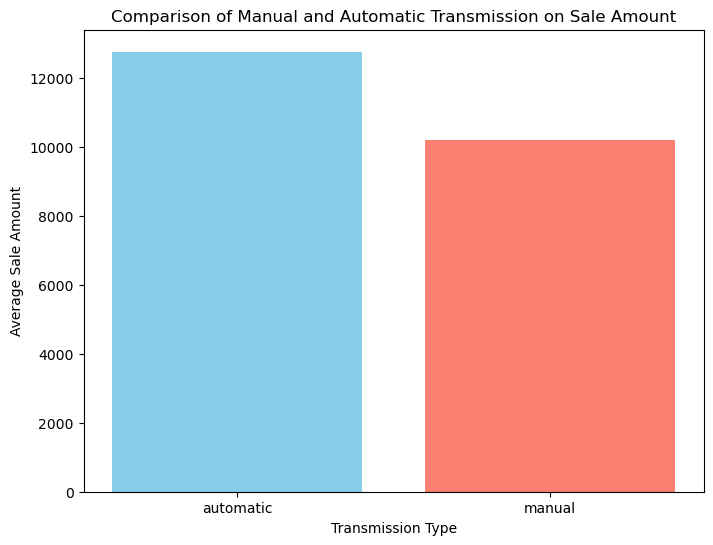

In [150]:
transmission_comparison = df.groupby('transmission')['sellingprice'].mean().reset_index(name='avg_sellingprice')

# Display table information
print("Comparison of Manual and Automatic Transmission on Sale Amount:")
print(transmission_comparison)

# Plot bar graph
plt.figure(figsize=(8, 6))
plt.bar(transmission_comparison['transmission'], transmission_comparison['avg_sellingprice'], color=['skyblue', 'salmon'])
plt.xlabel('Transmission Type')
plt.ylabel('Average Sale Amount')
plt.title('Comparison of Manual and Automatic Transmission on Sale Amount')
plt.show()


### Insight 3: What are the most trusted cars

Top 3 brands of the buying frequency for the cars are Ford, Chevrolet, Nissan, Toyota, and Dodge. This result will show us consumers are selecting either Japanese or American cars. Mostly Japanese cars has severe advatages based on America cars are:
- They are fuel economic
- They have less engine based on American cars
- Maintenance are less expensive than American cars


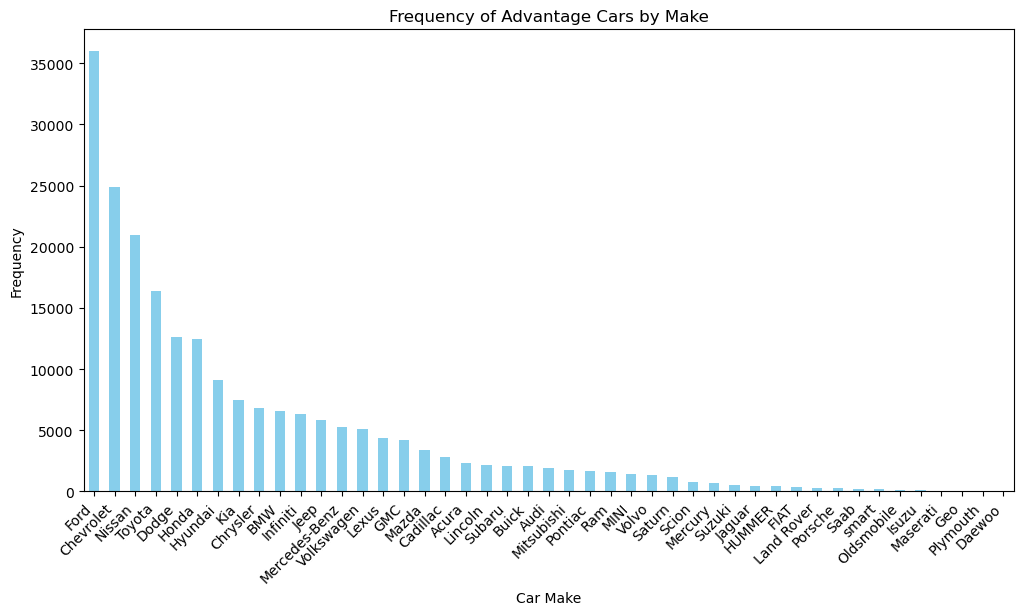

In [151]:
# Calculate the difference between selling price and MMR
df['price_difference'] = df['sellingprice'] - df['mmr']

# Identify advantage cars (positive price difference indicates advantage)
advantage_cars = df[df['price_difference'] > 0]

# Count the number of advantage cars for each make
advantage_cars_by_make = advantage_cars['make'].value_counts()

# Plot bar graph
plt.figure(figsize=(12, 6))
advantage_cars_by_make.plot(kind='bar', color='skyblue')
plt.title('Frequency of Advantage Cars by Make')
plt.xlabel('Car Make')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


### Insight 4: What are the active years on car sales

Based on the dataset most cars are build in 2012 and 2013. Based on the below CNN news it was related with the market. Market was suddenly down after 2007 and started to sales back again end of 2012 and beginning 0f 2013. And we can see that it was back to drop again 2015

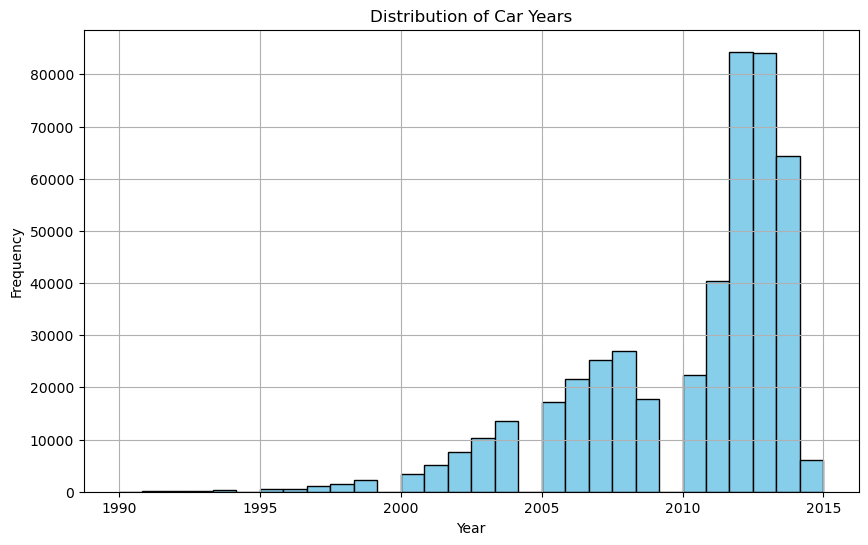

In [152]:
# Customer Behavior on Buying a New Car
# Distribution of 'year'

# Plot histogram of 'year'
plt.figure(figsize=(10, 6))
plt.hist(df['year'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Car Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Insight 5: What are the most selected colors of the cars?

Consumers mostly selects the main colors like black, White, silver, and gray car colors. 

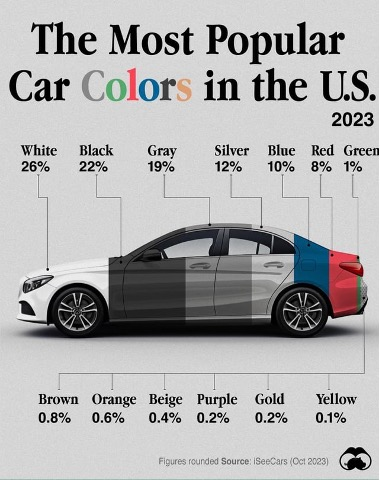

Frequency of Each Car Color:
color
black        88457
white        85532
silver       70013
gray         68737
blue         42404
red          36497
—            20962
gold          9473
green         9158
burgundy      7481
beige         7346
brown         5351
orange        1735
purple        1243
off-white     1189
yellow        1027
charcoal       415
turquoise      189
pink            39
lime            12
Name: count, dtype: int64


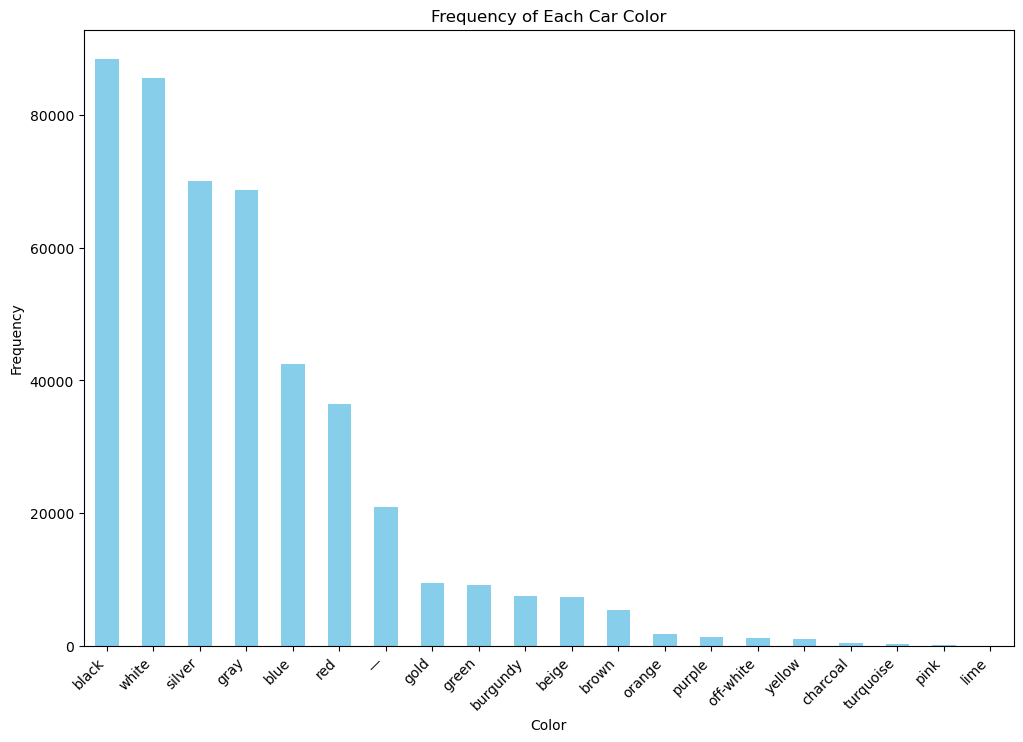

In [153]:
# Display table information
print("Frequency of Each Car Color:")
print(df['color'].value_counts())

# Plot bar graph to visualize frequency of each color
plt.figure(figsize=(12, 8))
color_frequency = df['color'].value_counts()
color_frequency.plot(kind='bar', color='skyblue')
plt.title('Frequency of Each Car Color')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') 
plt.show()


### Insight 6: How is the seasonal trend?

According to graph cars are mostly bought in December, January, February and March. These are the new models are mostly announced and old models are sold cheaper then the new ones. Also summer time hits the sale and I think this might be related with holiday season


/var/folders/9x/mxyckgjn73n1_w08rs2wdqmr0000gn/T/ipykernel_25420/375530624.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['saledate'] = pd.to_datetime(df['saledate'], utc=True).dt.tz_convert(None)


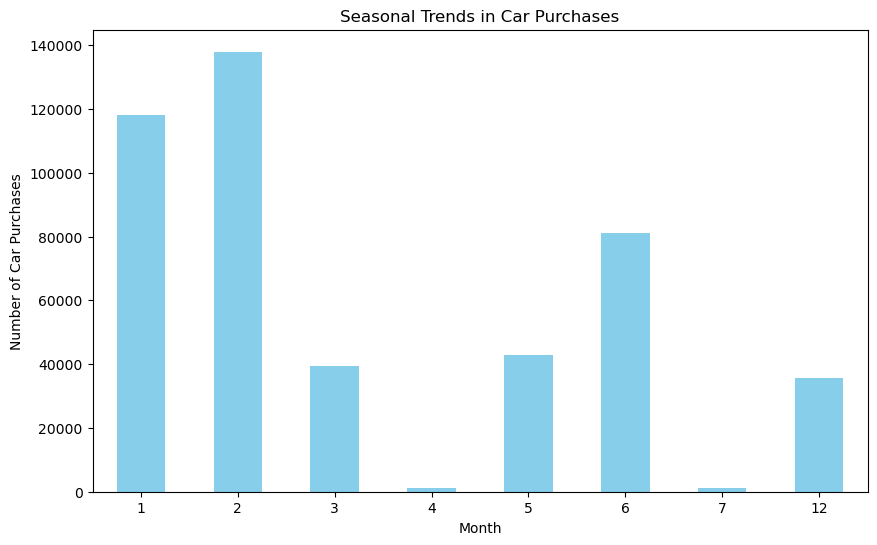

In [154]:
# Convert 'saledate' to datetime format and remove timezone information
df['saledate'] = pd.to_datetime(df['saledate'], utc=True).dt.tz_convert(None)

# Extract month from 'saledate'
df['month'] = df['saledate'].dt.month

# Count the number of car purchases for each month
monthly_car_purchases = df['month'].value_counts().sort_index()

# Plot bar graph to visualize seasonal trends in car purchases
plt.figure(figsize=(10, 6))
monthly_car_purchases.plot(kind='bar', color='skyblue')
plt.title('Seasonal Trends in Car Purchases')
plt.xlabel('Month')
plt.ylabel('Number of Car Purchases')
plt.xticks(rotation=0)
plt.show()


### Insight 7: How does miles affect to buying cars?

People mostly interested to buy less than 50K miles on the car. 230K people selects less than 50K, and 130K people select between 50K – 100K miles


Table: Number of Cars Sold Based on Odometer Readings
  Odometer Range  Number of Cars Sold
0          0-50k               218487
1       50k-100k               128487
2      100k-150k                74464
3      150k-200k                26986
4      200k-250k                 6792
5      250k-300k                 1511
6      300k-350k                  345
7      350k-400k                   87
8          400k+                  101


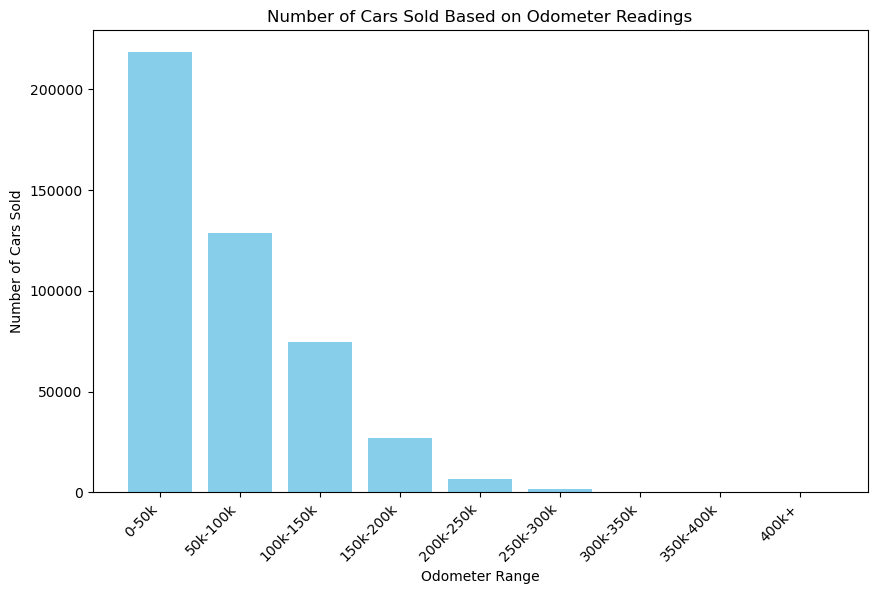

In [155]:

# Define the bins for odometer readings
bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, float('inf')]
labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-350k', '350k-400k', '400k+']

# Assign each car to its corresponding bin based on odometer reading
df['odometer_bin'] = pd.cut(df['odometer'], bins=bins, labels=labels, right=False)

# Create a table showing the number of cars sold based on odometer readings
odometer_counts = df['odometer_bin'].value_counts().sort_index()
odometer_counts_table = pd.DataFrame({'Odometer Range': odometer_counts.index, 'Number of Cars Sold': odometer_counts.values})

# Display the table
print("Table: Number of Cars Sold Based on Odometer Readings")
print(odometer_counts_table)

# Plot bar graph to visualize the number of cars sold based on odometer readings
plt.figure(figsize=(10, 6))
plt.bar(odometer_counts.index, odometer_counts.values, color='skyblue')
plt.title('Number of Cars Sold Based on Odometer Readings')
plt.xlabel('Odometer Range')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')
plt.show()


### Insight 8: Which caolors are selected based on top 5 soldout cars?

As per reports we can see that top 2 colors on mostly sold brands are black and White colors

<Figure size 1200x800 with 0 Axes>

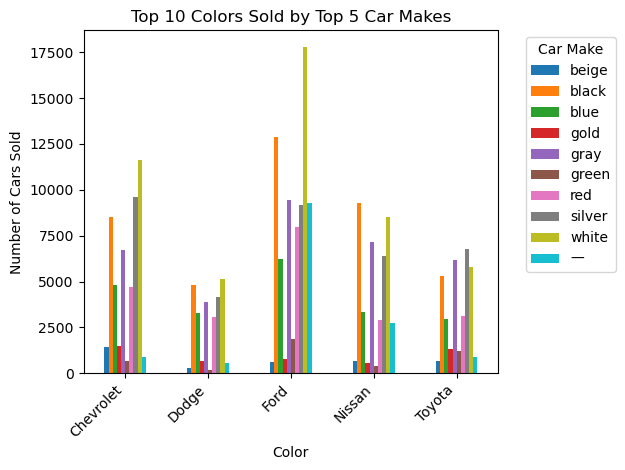

In [156]:
# Get the top 5 sold car brands
top_brands = df['make'].value_counts().nlargest(5).index

# Filter the data to include only the top 5 brands
df_top_brands = df[df['make'].isin(top_brands)]

# Get the top 10 sold colors
top_colors = df_top_brands['color'].value_counts().nlargest(10).index

# Filter the data to include only the top 10 colors
df_top_colors = df_top_brands[df_top_brands['color'].isin(top_colors)]

# Group the filtered data by 'make' and 'color', and count the number of cars sold for each combination
make_color_counts = df_top_colors.groupby(['make', 'color']).size().unstack(fill_value=0)

# Plot grouped bar chart to visualize top 10 colors sold by each top 5 car make
plt.figure(figsize=(12, 8))
make_color_counts.plot(kind='bar', stacked=False, colormap='tab10')
plt.title('Top 10 Colors Sold by Top 5 Car Makes')
plt.xlabel('Color')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Car Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Insight 9: What are the favorite body types?

As we can see from the graph that mostly US car market consumers selects the sedan cars. And it has been followed by SUV. Hatchback and VANs are rarely selected. This will give an idea about the culture I guess. Middle east people mostly selects the SUV models.


Table: Top 10 Most Sold Car Body Types
  Car Body Type  Number of Cars Sold
0         Sedan               207649
1           SUV               114964
2     hatchback                23678
3       minivan                21927
4         coupe                14698
5         wagon                14160
6      crew cab                12310
7   convertible                 8295
8       g sedan                 6938
9     supercrew                 6876


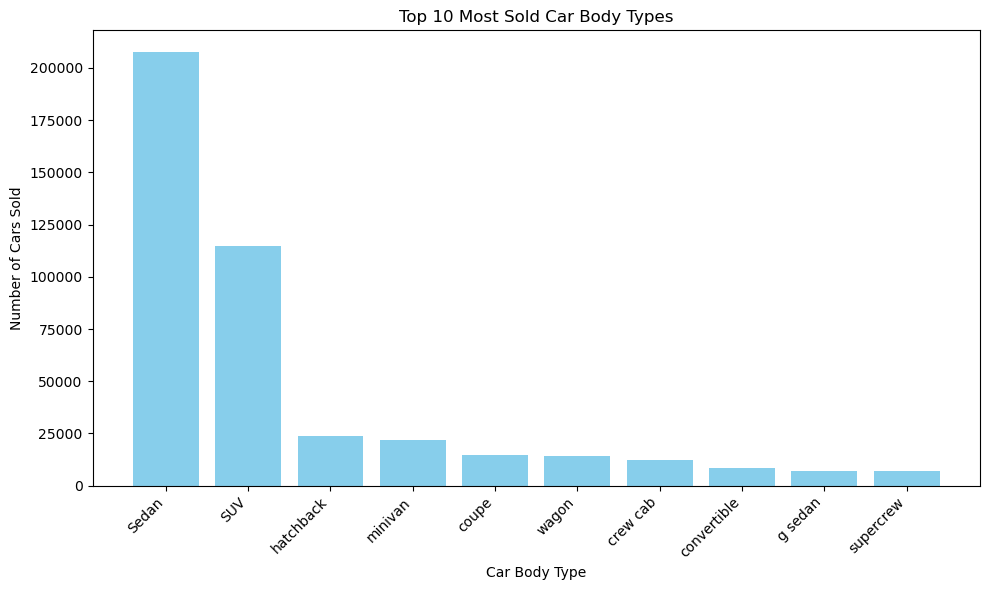

In [157]:
# Merge 'SUV' with 'suv' and 'Sedan' with 'sedan'
df['body'] = df['body'].str.lower().replace({'suv': 'SUV', 'sedan': 'Sedan'})

# Count the occurrences of each body type
body_counts = df['body'].value_counts().nlargest(10)

# Create a table to show the top 10 most sold car body types
body_counts_table = pd.DataFrame({'Car Body Type': body_counts.index, 'Number of Cars Sold': body_counts.values})

# Display the table
print("Table: Top 10 Most Sold Car Body Types")
print(body_counts_table)

# Plot a bar graph to visualize the top 10 most sold car body types
plt.figure(figsize=(10, 6))
plt.bar(body_counts.index, body_counts.values, color='skyblue')
plt.title('Top 10 Most Sold Car Body Types')
plt.xlabel('Car Body Type')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



### Insight 10: What are the top states of car buying?

First 2 states are California and Florida. This will give an idea that these state consumers are very offenly change their cars. And also financially in good situation.


Car Makes Sold Based on States (Top 10 Makes Only):
make    BMW  Chevrolet  Chrysler  Dodge  Ford  Honda  Hyundai   Kia  Nissan  \
state                                                                         
al        0          5         0      4     6      0        0     1       1   
az      144       1214       248    560  1010    246      367   269     665   
ca     4404       5595      1459   2738  7675   3590     2669  1701    6325   
co       72        845       158    365  1266    100      193   402     743   
fl     2558       6789      2455   4009  9106   3044     4272  2813    7394   
ga     1188       3178       905   1676  4479   1954     1293  1215    3108   
hi       13        120        26     78   194    111       61    30     160   
il      155       2849       818   1115  5344   1414      516   232    3483   
in       16        744       332    500   513    388      120   149     183   
la       12        321        58    138   313     31       52    58     184   


<Figure size 1200x800 with 0 Axes>

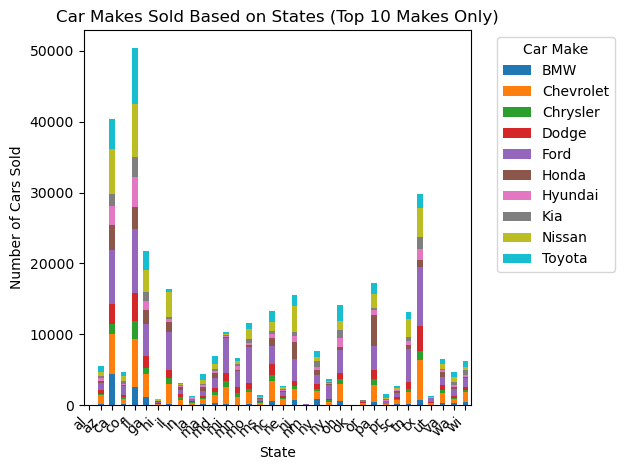

In [158]:

# Calculate the top 10 most sold car makes
top_10_makes = df['make'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 car makes
df_top_10_makes = df[df['make'].isin(top_10_makes)]

# Create a pivot table to count the number of car makes sold in each state
make_state_counts = pd.pivot_table(df_top_10_makes, index='state', columns='make', aggfunc='size', fill_value=0)

# Display the pivot table
print("Car Makes Sold Based on States (Top 10 Makes Only):")
print(make_state_counts)

# Plot a stacked bar chart to visualize the distribution of car makes sold based on states
plt.figure(figsize=(12, 8))
make_state_counts.plot(kind='bar', stacked=True, colormap='tab10')
plt.title('Car Makes Sold Based on States (Top 10 Makes Only)')
plt.xlabel('State')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Car Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Insight 11: How interior color affect to buy the cars?

As per dataset if the car color is black then interior color is selected as beige or black mostly. If the car color is white then beige and black is selected. This gives us an idea that interior color selection mostly dark colors and not related with car colors


Table: Relationship between Top 5 Car Colors and Top 5 Interiors
interior  beige  black   gray   tan     —
color                                    
black      7866  48765  22136  5879  1681
blue       4397  15664  17040  3268  1038
gray       3964  34289  25907  2291  1272
silver     2346  33934  29965  1382  1448
white     12579  29932  29440  9185  2031


<Figure size 1200x800 with 0 Axes>

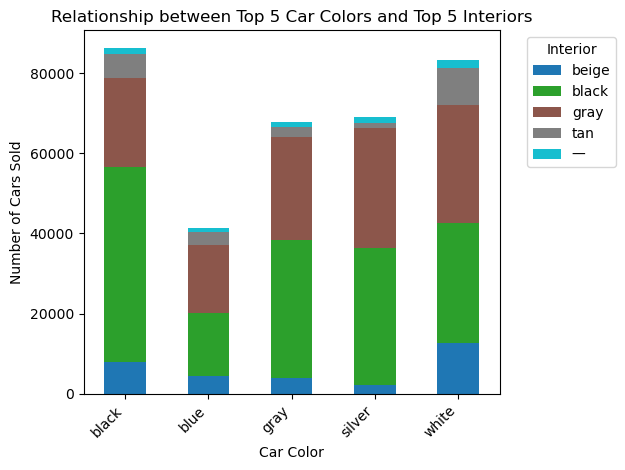

In [159]:
# Calculate the top 5 most common car colors and interiors
top_5_colors = df['color'].value_counts().nlargest(5).index
top_5_interiors = df['interior'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the top 5 colors and interiors
df_top_5 = df[df['color'].isin(top_5_colors) & df['interior'].isin(top_5_interiors)]

# Create a pivot table to count the number of cars sold for each combination of color and interior
color_interior_counts = pd.pivot_table(df_top_5, index='color', columns='interior', aggfunc='size', fill_value=0)

# Display the pivot table
print("Table: Relationship between Top 5 Car Colors and Top 5 Interiors")
print(color_interior_counts)

# Plot a stacked bar chart to visualize the relationship between top 5 car colors and top 5 interiors
plt.figure(figsize=(12, 8))
color_interior_counts.plot(kind='bar', stacked=True, colormap='tab10')
plt.title('Relationship between Top 5 Car Colors and Top 5 Interiors')
plt.xlabel('Car Color')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Interior', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Prediction: How color and body type affect the car sales?

Average car sale price (mean threshold) and use color and body features as an input. Result is compared the cars below the mean of the sale or above the sale of the price
After having 0.62 accuracy model reevaluated with CV. Results are as seen

The code loads data, preprocesses it, trains a KNN classifier, makes predictions, evaluates the model's accuracy, and visualizes its performance using a confusion matrix


Model accuracy: 0.6294399941274167


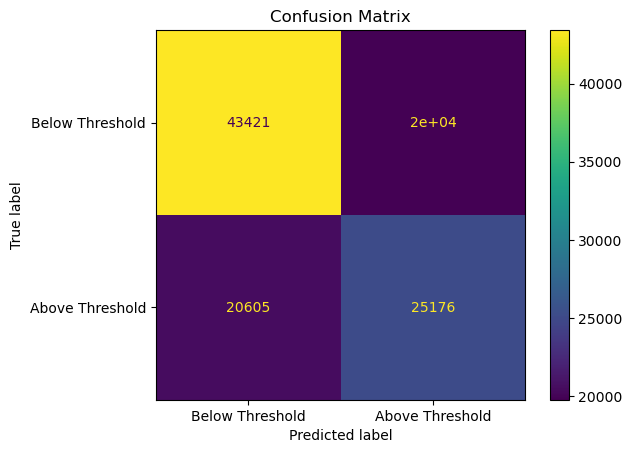

In [160]:

# Define a threshold selling price
threshold = data['sellingprice'].mean()  # You can adjust this threshold as needed

# Create a binary target variable indicating whether selling price is above the threshold
data['above_threshold'] = (data['sellingprice'] > threshold).astype(int)

# Encode categorical variables
label_encoder = LabelEncoder()
data['color'] = label_encoder.fit_transform(data['color'])
data['body'] = label_encoder.fit_transform(data['body'])

# Select features and target variable
X = data[['color', 'body']]
y = data['above_threshold']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the data into training and testing sets
knn_model = KNeighborsClassifier(n_neighbors=5)  # Create a KNN Classifier
knn_model.fit(X_train, y_train) # Train the model
predictions = knn_model.predict(X_test) # Make predictions

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Model accuracy:", accuracy)

# Plot confusion matrix
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Below Threshold', 'Above Threshold'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()


### Model Evaluation

Used grid search CV for the better evaluation but result accuracy increased 1 % all together. After applying grdi search result is:

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9} 
Model accuracy after tuning: 0.6324680448885586

Visualize the grid search results using a heatmap to see how different combinations of hyperparameters perform. The darker shades represent higher mean test scores, indicating better performance.


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9}
Model accuracy after tuning: 0.6324680448885586


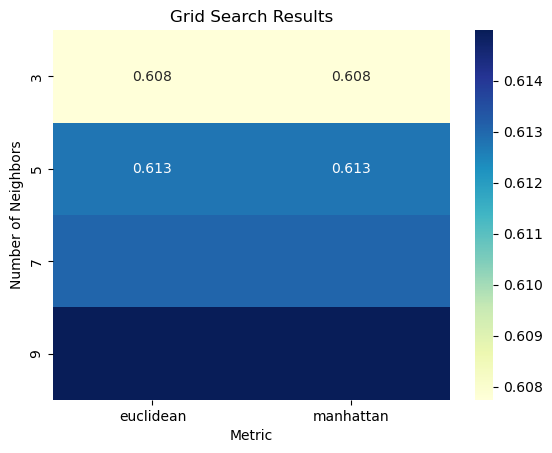

In [161]:
# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Adjust the range as needed
    'metric': ['euclidean', 'manhattan']  # Distance metrics to consider
}


knn_model = KNeighborsClassifier() # Create a KNN Classifier

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions using the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Model accuracy after tuning:", accuracy)

# Plotting heatmap of grid search results
results = pd.DataFrame(grid_search.cv_results_)
results_pivot = results.pivot_table(index='param_n_neighbors', columns='param_metric', values='mean_test_score')
sns.heatmap(results_pivot, annot=True, cmap='YlGnBu', fmt='.3f')
plt.title('Grid Search Results')
plt.xlabel('Metric')
plt.ylabel('Number of Neighbors')
plt.show()


In [164]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Print summary of results
print("Summary of Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print confusion matrix
cm = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:")
print(cm)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=['Below Threshold', 'Above Threshold']))


Summary of Results:
Accuracy: 0.6324680448885586
Precision: 0.5693929480189022
Recall: 0.5132260107905026
F1 Score: 0.5398524917859521

Confusion Matrix:
[[45431 17769]
 [22285 23496]]

Classification Report:
                 precision    recall  f1-score   support

Below Threshold       0.67      0.72      0.69     63200
Above Threshold       0.57      0.51      0.54     45781

       accuracy                           0.63    108981
      macro avg       0.62      0.62      0.62    108981
   weighted avg       0.63      0.63      0.63    108981



#### Summary of Results:
Threshold: Classifies selling prices into "Above Threshold" and "Below Threshold" categories is the mean selling price of all cars in the dataset.

#### Model Evaluation Metrics:

Accuracy: Represents the proportion of correctly classified instances out of all instances. In this model, the accuracy is 63.25%

Precision: Measures the accuracy of positive predictions.
- "Below Threshold" class: 67%
- "Above Threshold" class: 57%

Recall: Measures the ability of the model to find all the relevant cases within a dataset.
- "Below Threshold" class: 72%
- "Above Threshold" class: 51%

F1 Score: The harmonic mean of precision and recall, providing a balance between precision and recall. A higher F1 score indicates better performance. F1 scores of 69% for "Below Threshold" and 54% for "Above Threshold" suggest moderate performance for both classes
- "Below Threshold" class: 69%
- "Above Threshold" class: 54%

#### Confusion Matrix:
- True Positives (TP): 45,431 instances correctly predicted as "Below Threshold"
- False Positives (FP): 17,769 instances incorrectly predicted as "Below Threshold"
- True Negatives (TN): 23,496 instances correctly predicted as "Above Threshold"
- False Negatives (FN): 22,285 instances incorrectly predicted as "Above Threshold”

#### Overall:
- The model's accuracy is approximately 63.25%.
- It performs better in predicting instances classified as "Below Threshold" compared to "Above Threshold," as indicated by higher precision, recall, and F1 score for the former.
- The weighted average of accuracy, precision, recall, and F1-score across both classes is approximately 63%, indicating moderate overall performance

Therefore, based on the provided evaluation results, we cannot confidently conclude that vehicle color and body type do not affect the sale price.
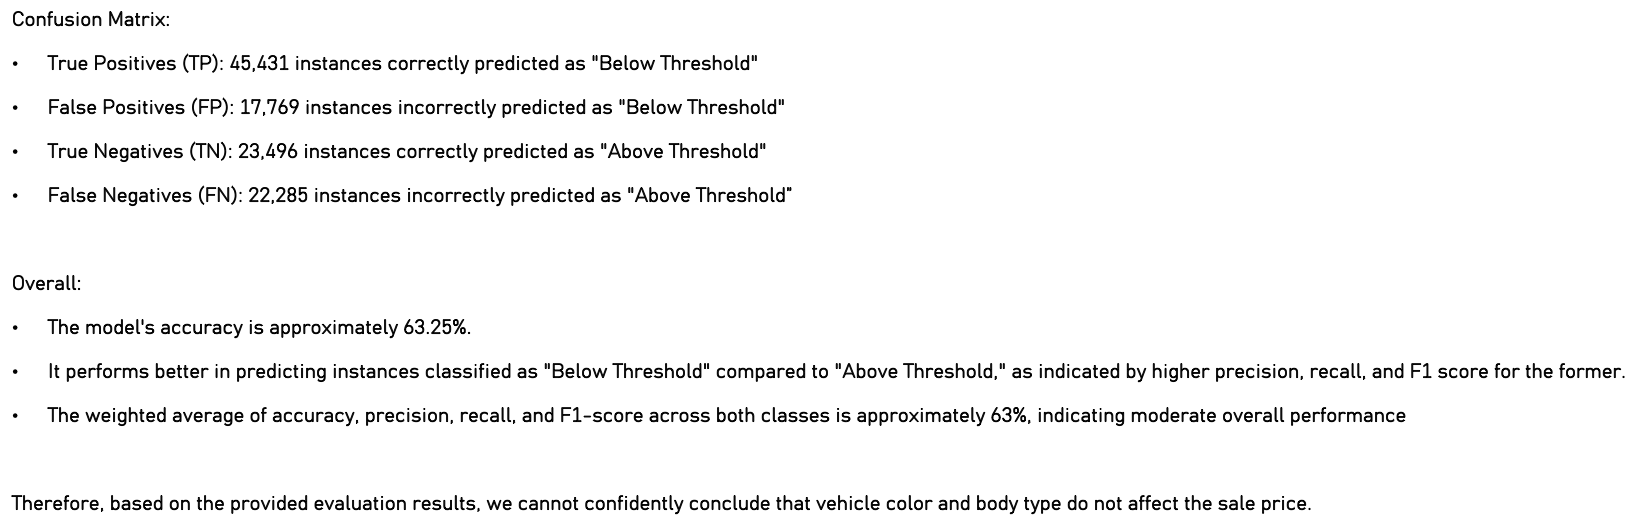